Scipy:

We have the min and max temperatures in a city In India for each months of the year. We would like to find a function to describe this and show it graphically, the dataset given below.

Task:

1.fitting it to the periodic function

2.plot the fit

Data

Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25

Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Max = [39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25]

Min = [21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18]

x = list(range(1,13))

In [28]:
data = {'max':Max,'min':Min}
df = pd.DataFrame(data,index=x)
df

,max,min
1,39,21
2,41,23
3,43,27
4,47,28
5,49,32
6,51,35
7,45,31
8,38,28
9,37,21
10,29,19


<AxesSubplot:>

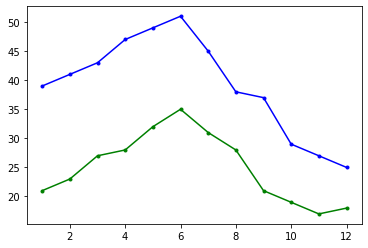

In [29]:
df['max'].plot(style='b.-')
df['min'].plot(style='g.-')

In [30]:
from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 1.8 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps,x,
                                      df['max'], [40, 20, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps,x,
                                      df['min'], [-40, 20, 0])

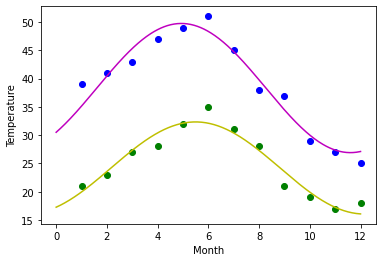

In [31]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(x, df['max'], 'bo')
plt.plot(days, yearly_temps(days, *res_max), 'm-')
plt.plot(x,df['min'], 'go')
plt.plot(days, yearly_temps(days, *res_min), 'y-')
plt.xlabel('Month')
plt.ylabel('Temperature')

plt.show()

2. Matplotlib:
This assignment is for visualization using matplotlib: data to use:

url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv

titanic = pd.read_csv(url)

Charts to plot:

1. Create a pie chart presenting the male/female proportion
2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [33]:
titanic= pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv')

In [34]:
data = titanic['sex'].value_counts()
data

male      843
female    466
Name: sex, dtype: int64

In [35]:
labels=data.index
labels

Index(['male', 'female'], dtype='object')

([<matplotlib.patches.Wedge at 0x1f42c591910>,
 [Text(-0.48083677220945115, 0.9893411941747885, 'male'),
  Text(0.48083667958064136, -0.9893412391939719, 'female')],
 [Text(-0.262274603023337, 0.5396406513680664, '64.40'),
  Text(0.26227455249853165, -0.5396406759239846, '35.60')])

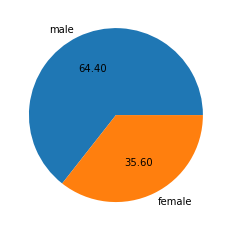

In [36]:
## 1.Create a pie chart presenting the male/female proportion
plt.pie(data,labels=labels,autopct = '%.2f')

In [37]:
titanic['Sex'] = np.where(titanic['sex']=='male',1,0)
titanic.head(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,Sex
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",0
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0


<AxesSubplot:xlabel='fare', ylabel='age'>

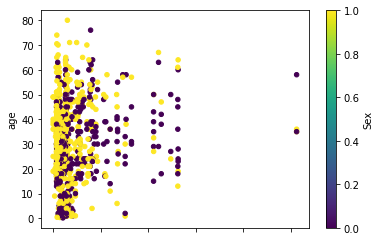

In [38]:
## 2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender
titanic.plot.scatter(x='fare',y='age',c='Sex',cmap='viridis')